<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex1_Linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict profits for a food truck by linear regression**

In [0]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load dataset
data = np.loadtxt(open("ex1data1.txt", "r"), delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(y)

In [4]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [5]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [0]:
# Visualize data
def plot_data(x, y):
    plt.plot(x, y, linestyle='', marker='x', color='r', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

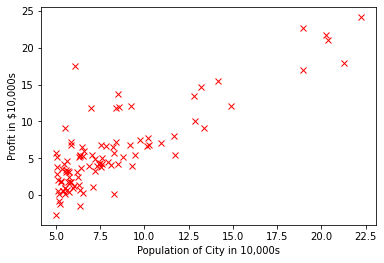

In [7]:
# Plot and shou the figure
plt.figure()
plot_data(X, y)
plt.show()

In [8]:
# Add a column of ones to X to accommodate the theta_0 intercept term
X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [9]:
# Initialize fitting parameters with zeros
theta = np.zeros(2)
theta

array([0., 0.])

In [0]:
# Gradient descent setting
iterations = 1500
alpha = 0.01

In [0]:
# Compute cost for linear regression
def compute_cost(x, y, theta):
    """
    Arguments:
    X -- Training data, shape (n_samples, n_features)
    y -- Labels, shape (n_samples,)
    theta -- Linear regression parameterndarray, shape (n_features,)

    Return:
    J -- The cost of using theta as the parameter for linear regression
         to fit the data points in X and y
    """
    m = len(y)
    J = np.sum(np.square(np.dot(x, theta)-y)) / (2.0*m)

    return J

In [12]:
cost = compute_cost(X, y, theta)
print("The cost of initial theta: ", cost)

The cost of initial theta:  32.072733877455676


In [0]:
# Gradient descent to learn theta
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Arguments:
    ----------
    X -- Training data, shape (n_samples, n_features)
    y -- Labels, shape (n_samples,)
    theta --  Linear regression parameterndarray, shape (n_features,)
    alpha -- Learning rate
    num_iters -- Number of iteration

    Returns:
    theta -- Linear regression parameterndarray, shape (n_features,)
    J_history -- Cost history, shape (num_iters,)
        
    """
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * np.dot((np.dot(X, theta) - y).T, X)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [14]:
# Run gradient descent
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta)

Theta found by gradient descent:  [-3.63029144  1.16636235]


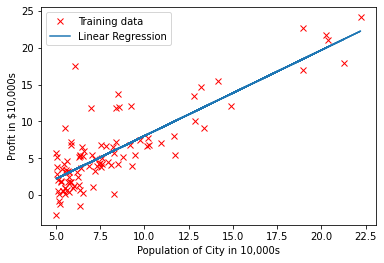

In [15]:
# Plot the linear fit
plt.figure()
plot_data(X[:, 1], y)
plt.plot(X[:, 1], X.dot(theta), label='Linear Regression')
plt.legend(loc='upper left', numpoints=1)
plt.show()

In [16]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print("For population = 35,000, we predict a profit of", predict1 * 10000)

predict2 =  np.dot(np.array([1, 7]), theta)
print("For population = 70,000, we predict a profit of", predict2 * 10000)

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944712


In [0]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)

# Transpose J_vals before calling plot_surface
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

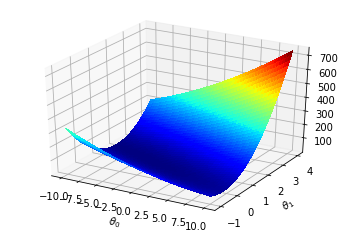

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

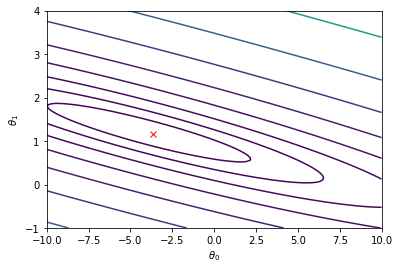

In [19]:
# Contour plot
plt.figure()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()